DATA CLEANING PART

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan = pd.read_csv(r'C:\Users\Dell\Desktop\jupyter\loan.csv', sep=",")
loan.info()
# let's look at the first few rows of the df
loan.head()
# Looking at all the column names
loan.columns
loan.isnull().sum()
round(loan.isnull().sum()/len(loan.index), 2)*100
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)
100*(loan.isnull().sum()/len(loan.index))
100*(loan.isnull().sum()/len(loan.index))
pd.set_option('display.max_columns', 500)
loan.head()
# The column int_rate is character type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))#data type change
# also, lets extract the numeric part from the variable employment length
# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]
# using regular expression to extract numeric values from the string


C:\Users\Dell\Anacondanew\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_

In [3]:
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [4]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
"desc","mths_since_last_delinq"]
behaviour_var
df = loan.drop(behaviour_var, axis=1)
df.info()
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

(38642, 28)

In [5]:
import csv
df.to_csv(r'C:\Users\Dell\Desktop\jupyter\clean.csv', index=False) 
pd.set_option('display.max_columns',31)
df.shape
df1=pd.Series([])
df2=pd.Series([])
df3=pd.Series([])
# creating separate columns by binnig the columns loan_amnt to loan_amnt_range
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)
# creating separate columns by binnig the columns installment to installment_range
bins1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1500]
slot1=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000','1000-1100','1100-1200','1200 and above']
df['installment_range']=pd.cut(df['installment'],bins1,labels=slot1)
# creating separate columns by binnig the columns annual_inc to annual_range
bins2=[0,8000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,5000000]
slot2=['0-8000','8000-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000-1100000','1100000-1200000','1200000-1300000','1300000-1400000','1400000-1500000','1500000-1600000','1600000-1700000','1700000 and above']
df['annual_range']=pd.cut(df['annual_inc'],bins2,labels=slot2)
df=df[df.loan_status != 'Current']
df1=df[df['loan_status']=='Fully Paid'] #creating a new dataframe of fully paid members
df2=df[df['loan_status']=='Charged Off']#creating a new dataframe of chargedoff members
print("It is dataframe which contain some rows with no null value")
df.shape

It is dataframe which contain some rows with no null value


(37544, 31)

filling of missing values

In [41]:
# using fillna function to fill the missing values
df['emp_title'].fillna("self employed", inplace = True)
df['emp_length'].fillna("0",inplace=True)
df['collections_12_mths_ex_med'].fillna("0.0",inplace=True)
df['chargeoff_within_12_mths'].fillna("0.0",inplace=True)
df['pub_rec_bankruptcies'].fillna("0.0",inplace=True)
df['tax_liens'].fillna("0.0",inplace=True)

In [42]:
#creating new column of monthly income of members from annual_inc column
df['mon_inc']=df['annual_inc']/12

In [43]:
#creating new column of year through separating year part from issue_d column
df['year']= df['issue_d'].str.split("-")
df['year']=df['year'].apply(lambda x: x[1])

In [44]:
#displaying the decription till 99%
df.describe(percentiles=[0.99])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,policy_code,acc_now_delinq,delinq_amnt,mon_inc
count,3.754400e+04,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000,37544.0,37544.0,37544.0,37544.000000
mean,6.743002e+05,8.394864e+05,11119.329986,10853.560489,10280.495739,11.963319,324.650164,5.061048,6.940708e+04,13.284186,1.0,0.0,0.0,5783.923352
std,2.098464e+05,2.655176e+05,7354.098954,7096.316776,7034.124211,3.683012,208.901055,3.401750,6.467698e+04,6.660551,0.0,0.0,0.0,5389.748707
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,1.0,0.0,0.0,333.333333
50%,6.534655e+05,8.352880e+05,10000.000000,9600.000000,8850.000000,11.830000,280.000000,4.000000,6.000000e+04,13.380000,1.0,0.0,0.0,5000.000000
99%,1.063111e+06,1.295231e+06,35000.000000,35000.000000,34725.000000,20.990000,931.933500,10.000000,2.350000e+05,26.510000,1.0,0.0,0.0,19583.333333
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,1.0,0.0,0.0,500000.000000


This are values of following columns at 99 percentile and max values.Since there is no much difference between value at 99 percentile and max so we can fill the missing values with its mean of a column since we are doing exploratory data analysis so no necessary to fill it is required when modelling is done.

**Outlier detection of loan_amnt, installment,int_rate,funded_amnt,funded_amnt_inv columns

this is plots of outliers detection the red points are outliers for following columns


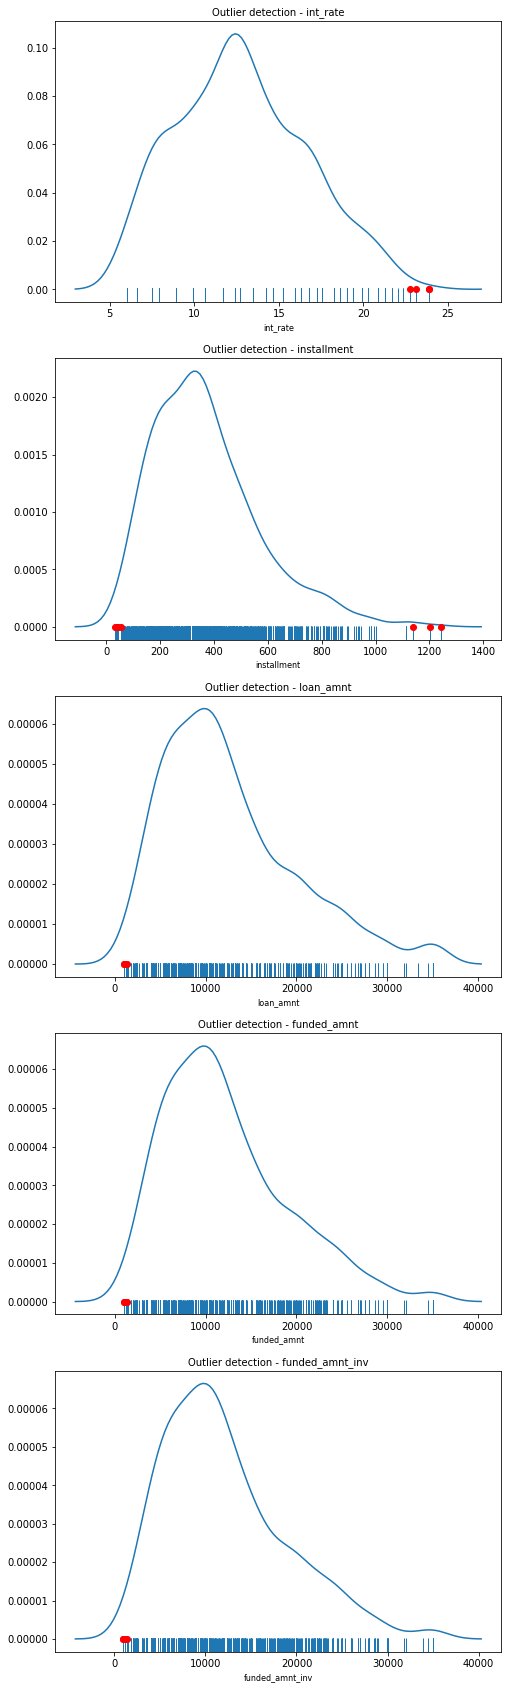

In [45]:
print("this is plots of outliers detection the red points are outliers for following columns")
def percentile_based_outlier(data, threshold=99):#function to define outliers according to percentage
    diff = (100 - threshold) / 2 #calculating differnce
    minval, maxval = np.percentile(data, [diff, 100 - diff]) #calculating percentile
    return (data < minval) | (data > maxval) #return the value

col_names = ['int_rate','installment','loan_amnt','funded_amnt','funded_amnt_inv']#selected four columns of a dataframe
fig, ax = plt.subplots(len(col_names), figsize=(8,30)) #subplots

for i, col_val in enumerate(col_names): #loop
    x = df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False) #histogram
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()#display

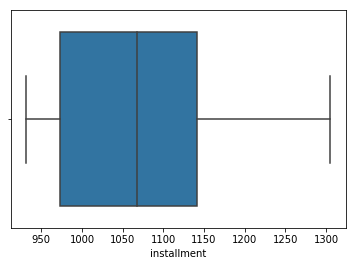

In [46]:
#after removing the outliers the analysis is like this.
df3=df.loc[df['installment']>931.0] #making a new dataframe of without outliers
sns.boxplot(df3['installment'])#plotting boxplot
plt.show()#display

UNIVARIATE ANALYSIS

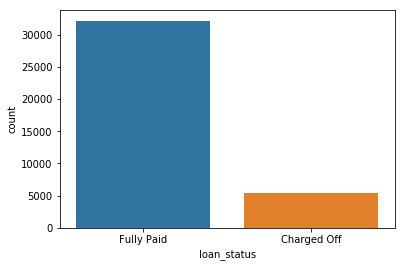

In [47]:
sns.countplot(df['loan_status'])#using countplot function
plt.show()#display graph

It indicates count of fully paid and chargedoff members in total dataset

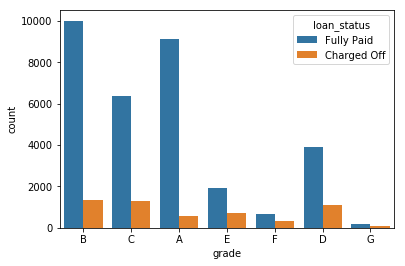

In [48]:
sns.countplot(x='grade',hue='loan_status',data=df)#using countplot and hue function
plt.show()#display

It indicates that count different grade of fully paid members and charged off members 

          Observation count of purpose for which the loan is taken by fully paid and chargedoff member


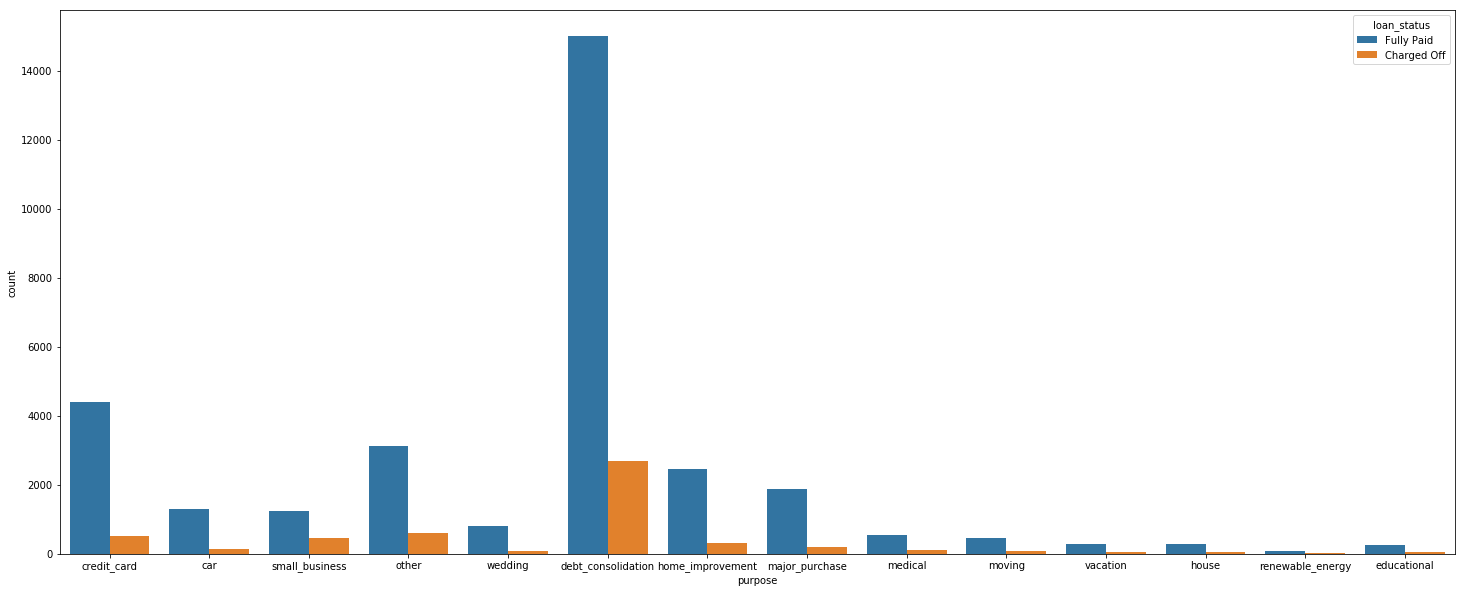

In [49]:
print("          Observation count of purpose for which the loan is taken by fully paid and chargedoff member")
plt.figure(figsize=(25,10))#figure size
sns.countplot(x='purpose',hue='loan_status',data=df)# using countplot count of purpose column
plt.show()#display

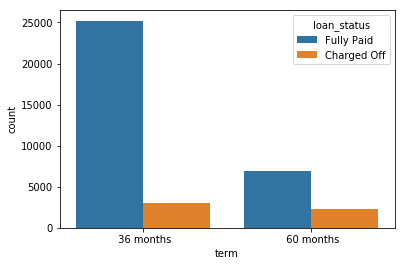

In [50]:
#using countplot
sns.countplot(x='term',hue='loan_status',data=df)
plt.show()#display

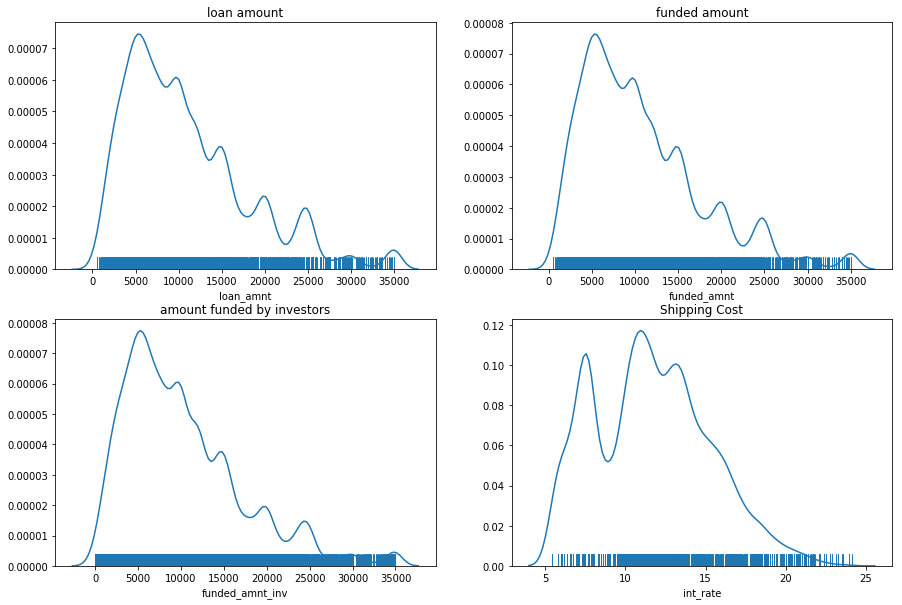

In [51]:
plt.figure(figsize=(15,10))
#subplot1
plt.subplot(2, 2, 1)
plt.title('loan amount')
sns.distplot(df1['loan_amnt'],rug=True,hist=False)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('funded amount')
sns.distplot(df1['funded_amnt'],rug=True,hist=False)

# subplot 3
plt.subplot(2, 2, 3)
plt.title('amount funded by investors')
sns.distplot(df1['funded_amnt_inv'],rug=True,hist=False)

# subplot 4
plt.subplot(2, 2, 4)
plt.title('Shipping Cost')
sns.distplot(df1['int_rate'],rug=True,hist=False)

plt.show()

**histogram subplot of loan_amnt,funded_amnt,funded_amnt_inv,int_rate columns of fully paid members

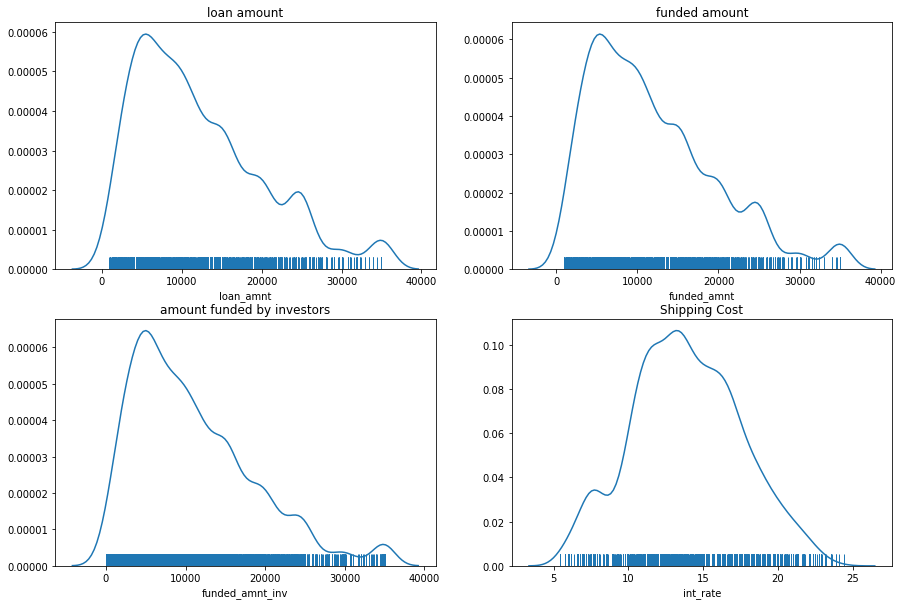

In [52]:
plt.figure(figsize=(15,10))
#subplot1
plt.subplot(2, 2, 1)
plt.title('loan amount')
sns.distplot(df2['loan_amnt'],rug=True,hist=False)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('funded amount')
sns.distplot(df2['funded_amnt'],rug=True,hist=False)

# subplot 3
plt.subplot(2, 2, 3)
plt.title('amount funded by investors')
sns.distplot(df2['funded_amnt_inv'],rug=True,hist=False)

# subplot 4
plt.subplot(2, 2, 4)
plt.title('Shipping Cost')
sns.distplot(df2['int_rate'],rug=True,hist=False)

plt.show()

**histogram subplot of loan_amnt,funded_amnt,funded_amnt_inv,int_rate columns of chargedoff members

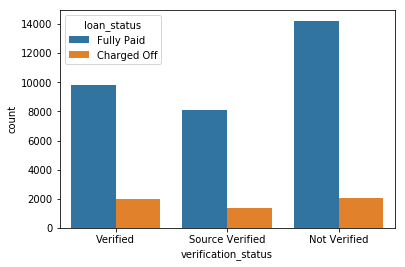

In [53]:
#countplot of verification_status column
sns.countplot(x='verification_status',hue='loan_status',data=df)
plt.show()

count of home_ownership whose verification status is verified


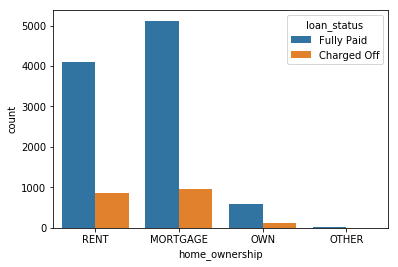

In [54]:
df1=df[df['verification_status']=='Verified']
print("count of home_ownership whose verification status is verified")
sns.countplot(x='home_ownership',hue='loan_status',data=df1)
plt.show()

count of home_ownership whose verification status is not verified


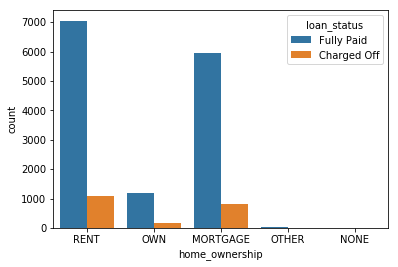

In [55]:
df2=df[df['verification_status']=='Not Verified']
print("count of home_ownership whose verification status is not verified")
sns.countplot(x='home_ownership',hue='loan_status',data=df2)
plt.show()

In [56]:
#FINDING CORRELATION
cor=df.corr() #using corr function
round(cor,5)#using round function

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,policy_code,acc_now_delinq,delinq_amnt,mon_inc
id,1.00000,0.99350,0.12520,0.13582,0.23749,0.05825,0.07964,0.10782,0.00895,0.09178,NaN,NaN,NaN,0.00895
member_id,0.99350,1.00000,0.12528,0.13514,0.24760,0.05524,0.07475,0.11241,0.01007,0.09315,NaN,NaN,NaN,0.01007
loan_amnt,0.12520,0.12528,1.00000,0.98160,0.93687,0.29924,0.93169,0.14827,0.26628,0.06140,NaN,NaN,NaN,0.26628
funded_amnt,0.13582,0.13514,0.98160,1.00000,0.95530,0.30296,0.95772,0.14793,0.26196,0.06125,NaN,NaN,NaN,0.26196
funded_amnt_inv,0.23749,0.24760,0.93687,0.95530,1.00000,0.29570,0.90411,0.15885,0.24932,0.07001,NaN,NaN,NaN,0.24932
int_rate,0.05825,0.05524,0.29924,0.30296,0.29570,1.00000,0.27479,-0.00060,0.04609,0.11219,NaN,NaN,NaN,0.04609
installment,0.07964,0.07475,0.93169,0.95772,0.90411,0.27479,1.00000,0.12110,0.26468,0.05073,NaN,NaN,NaN,0.26468
emp_length,0.10782,0.11241,0.14827,0.14793,0.15885,-0.00060,0.12110,1.00000,0.11111,0.04862,NaN,NaN,NaN,0.11111
annual_inc,0.00895,0.01007,0.26628,0.26196,0.24932,0.04609,0.26468,0.11111,1.00000,-0.12358,NaN,NaN,NaN,1.00000
dti,0.09178,0.09315,0.06140,0.06125,0.07001,0.11219,0.05073,0.04862,-0.12358,1.00000,NaN,NaN,NaN,-0.12358


BIVARIATE ANALYSIS

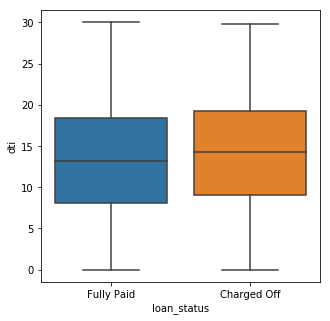

In [57]:
plt.figure(figsize = (5, 5))
sns.boxplot(x='loan_status', y='dti', data = df)
plt.show()

Here dti percentile of chargedoff is higher.

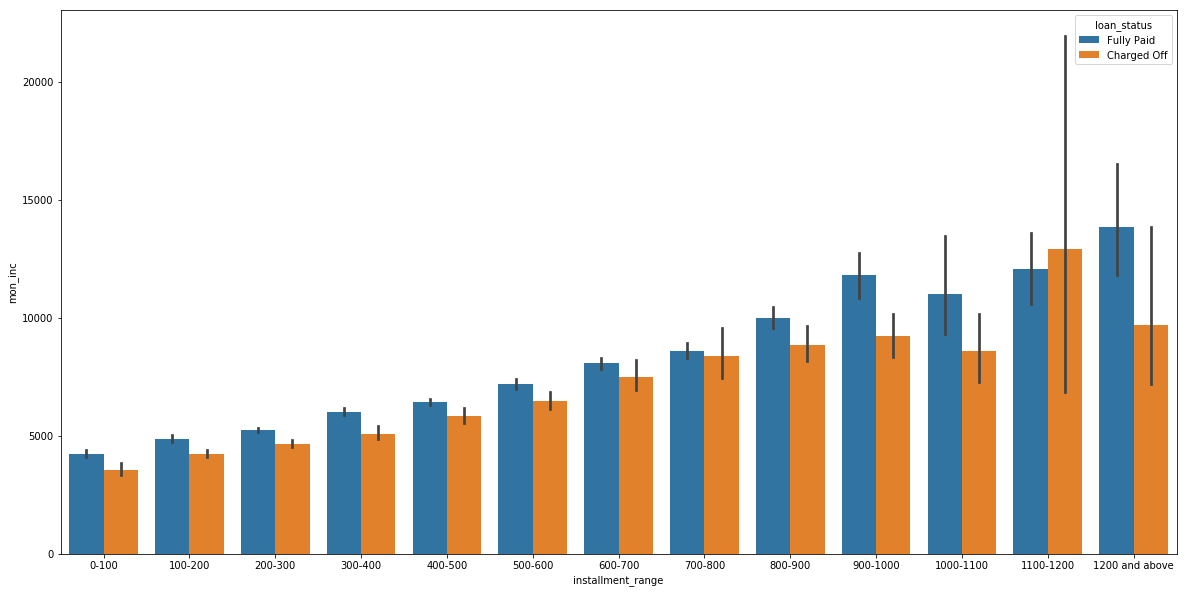

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(x='installment_range',y='mon_inc',hue='loan_status',data=df)
plt.show()

It is plot of comparison of interest rate is charged in every loan amount range for fully paid members and chargedoff members


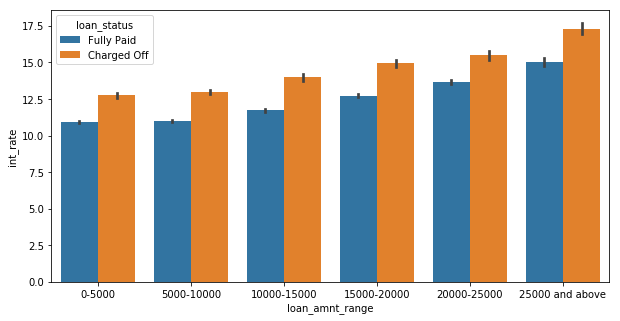

In [59]:
print("It is plot of comparison of interest rate is charged in every loan amount range for fully paid members and chargedoff members")
plt.figure(figsize=(10,5))
sns.barplot(x='loan_amnt_range',y='int_rate',hue='loan_status',data=df)
plt.show()

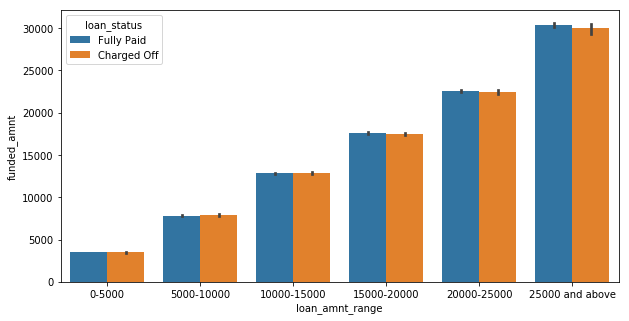

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_amnt_range',y='funded_amnt',hue='loan_status',data=df)
plt.show()

Almost for every loan_amnt_range ,funded_amnt is same but loan_amnt_range>=25000 funded amount is less for chargedoff members as compared to fully paid members.


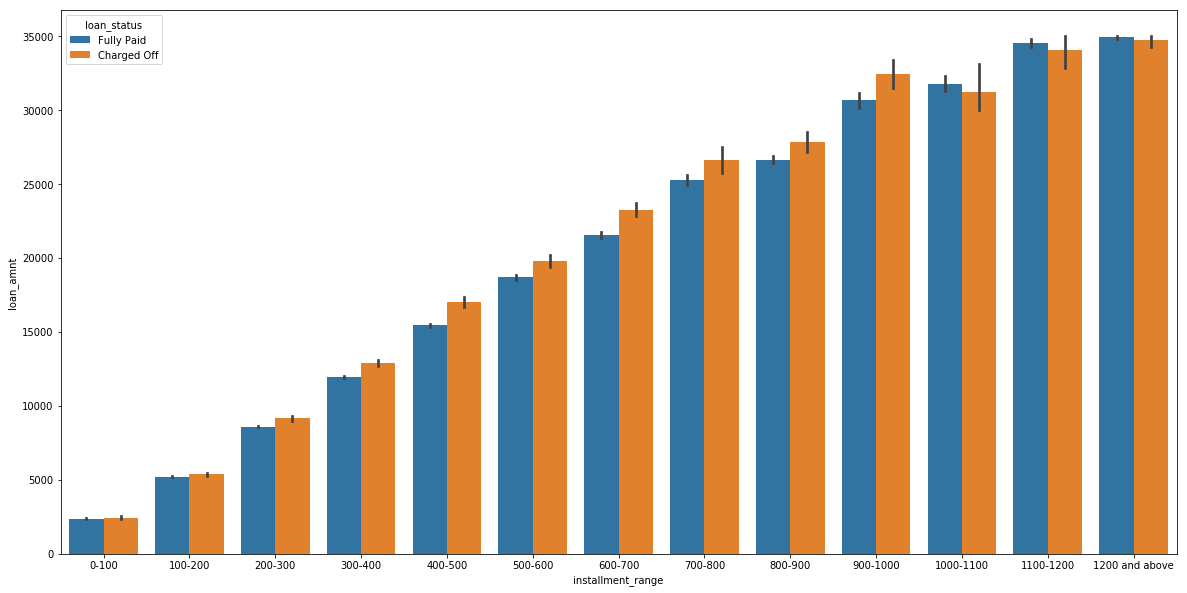

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x='installment_range', y='loan_amnt',hue='loan_status',data=df)
plt.show()

Distribution of installment _range and loan_amnt  for fully paid members and chargedoff members are not uniform because for some installment_range loan_amnt is higher for fully paid member and lower for chargedoff members and vice-versa.


scatter plot for grade and annual_range


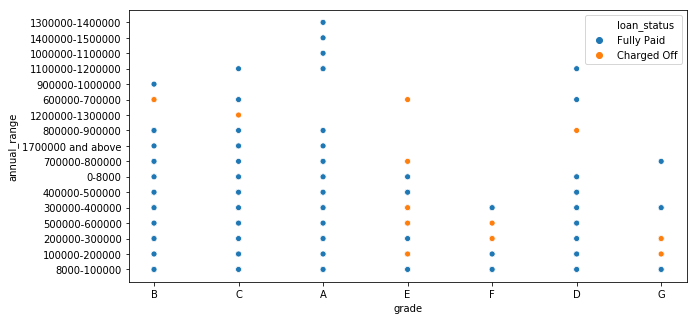

In [62]:
print("scatter plot for grade and annual_range")
plt.figure(figsize=(10,5))
sns.scatterplot(x='grade',y='annual_range',hue='loan_status',data=df)
plt.show()

**It is plot between term and emp_length column

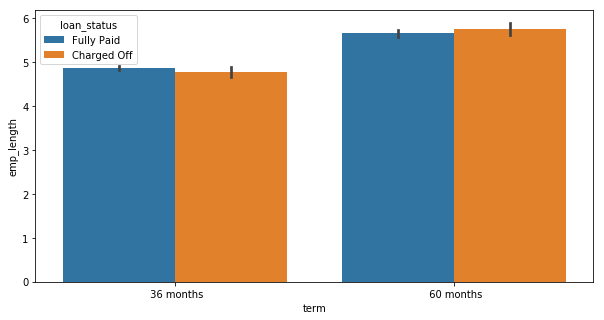

In [63]:
plt.figure(figsize=(10,5))#figure size
sns.barplot(x='term',y='emp_length',hue='loan_status',data=df)#using barplot function
plt.show()#to display

this plot indicates that emp_length is higher for term of 60 months than 36 months term.

**TYPE DRIVEN METRICS

In [64]:
def annual_income(n): #function created
    if n<=100000: #condition
        return 'low'
    elif n>100000 and n<=800000:
        return 'medium'
    elif n>800000 and n<=1500000:
        return 'high'
    else:
        return 'very high'
       
df['annual_status']=df['annual_inc'].apply(lambda x:annual_income(x)) #new column created annual_status which is derived from 
                                                                      #annual_inc column using apply function

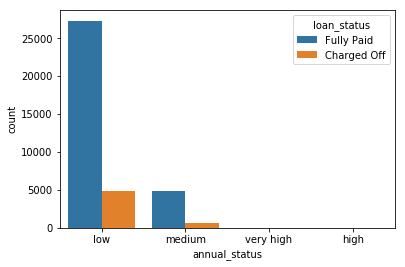

In [65]:
sns.countplot(x='annual_status',hue='loan_status',data=df)#countplot of annual_status
plt.show()#display

**Conclusion

In [66]:
no_of_fully=32145
total=37544
p1=no_of_fully/total
print("Probability of fully paid applicant:")
round(p1,4)

Probability of fully paid applicant:


0.8562

In [67]:
no_of_charged=5399
total=37544
p2=no_of_charged/total
print("Probability of charged off applicant:")
round(p2,4)

Probability of charged off applicant:


0.1438